In [1]:
import earthkit.data
import earthkit.plots
import cartopy.crs as ccrs
import numpy as np

In [2]:
era5 = earthkit.data.from_source(
    'cds',
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': '2m_temperature',
        'year': '2024',
        'month': '02',
        'day': '28',
        'time': '12:00',
    },
)

2024-05-10 07:33:43,813 INFO Welcome to the CDS
2024-05-10 07:33:43,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-10 07:33:44,084 INFO Request is queued
2024-05-10 07:33:45,131 INFO Request is running
2024-05-10 07:33:46,680 INFO Request is completed
2024-05-10 07:33:46,682 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data7/adaptor.mars.internal-1715322824.7792354-12898-6-3dc3b466-f9f9-4ce7-b424-aa2cde5683cc.grib to /var/folders/vt/7j2c2tmx4m14gn_sg3zpf5l00000gn/T/tmpazo76xwf/cds-retriever-7a84f90186994810eea8118bff163b75adc5ebc15d9cdb1807fb3b30ad0796d9.cache.tmp (2M)
2024-05-10 07:33:47,176 INFO Download rate 4M/s                                                                                                                                                                                              


In [3]:
ring = earthkit.data.from_source("file", "/Users/mavj/Downloads/H128_ring 1.grib")
nest = earthkit.data.from_source("file", "/Users/mavj/Downloads/H128_nested.grib")

In [4]:
STYLE = earthkit.plots.styles.Style(
    levels=np.arange(0, 20, 0.5),
    extend="both",
    colors="turbo",
    units="celsius",
)

DOMAIN = ["France", "Spain"]







2024-05-10 07:33:48,754 INFO Downloading https://get.ecmwf.int/repository/earthkit/regrid/matrices/index.json


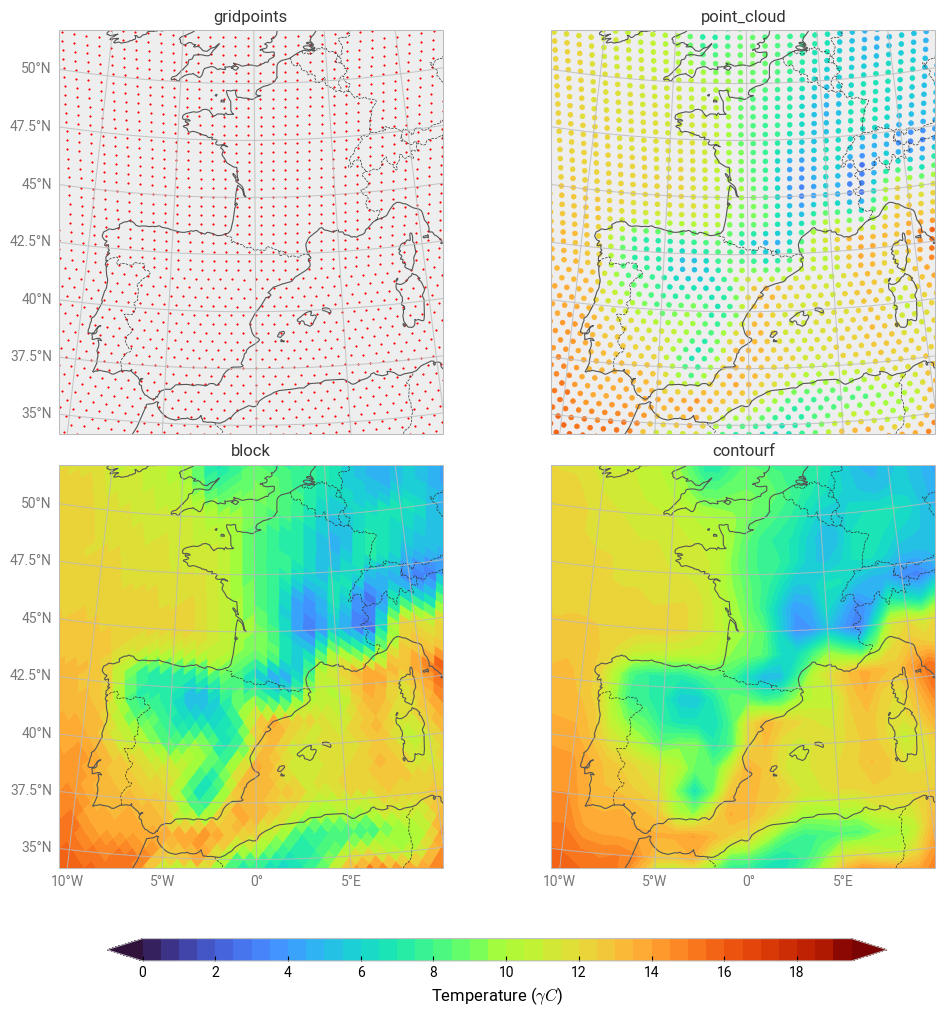

In [5]:
figure = earthkit.plots.Figure(rows=2, columns=2, size=(10, 10))

for method in ["gridpoints", "point_cloud", "block", "contourf"]:
    style = STYLE if method != "gridpoints" else None
    subplot = figure.add_map(domain=DOMAIN)
    getattr(subplot, method)(ring, style=style)
    subplot.title(method)

figure.coastlines()
figure.borders()
figure.gridlines(sharex=True, sharey=True)

figure.legend()

figure.show()

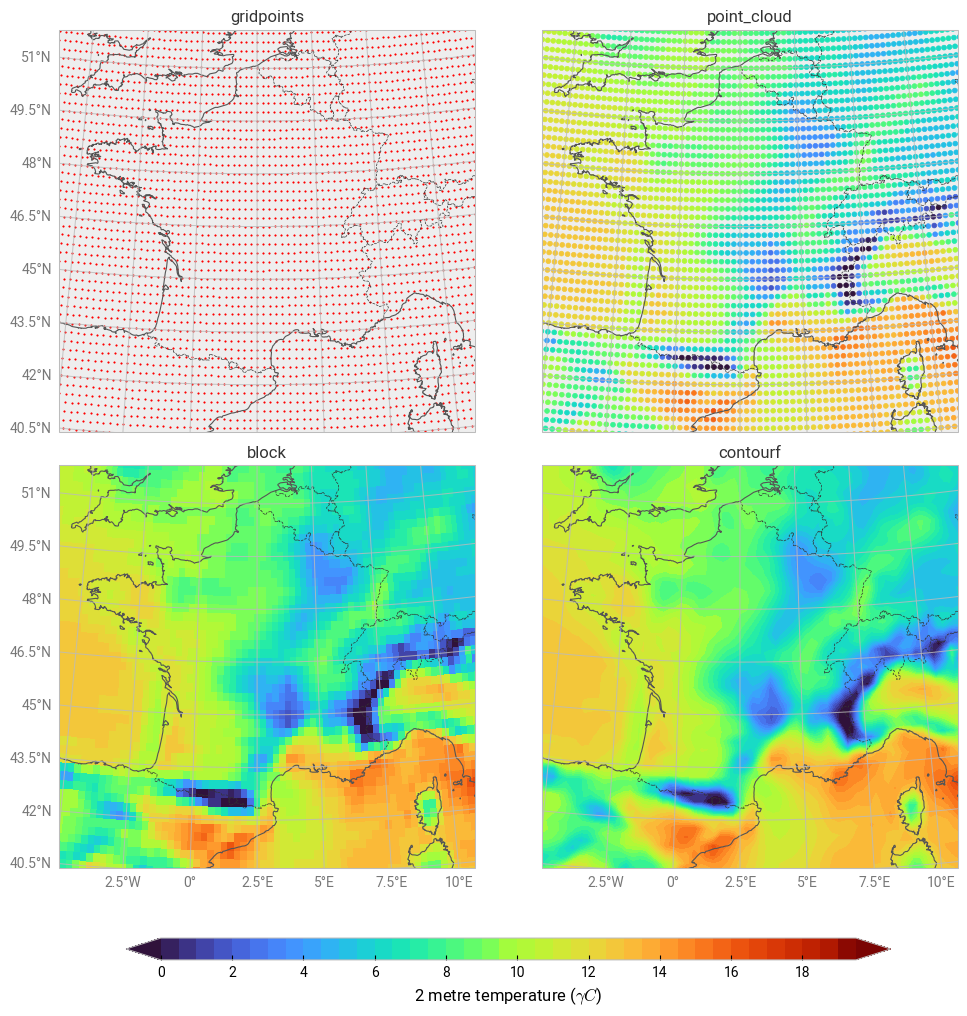

In [6]:
figure = earthkit.plots.Figure(rows=2, columns=2, size=(10, 10))

for method in ["gridpoints", "point_cloud", "block", "contourf"]:
    style = STYLE if method != "gridpoints" else None
    subplot = figure.add_map(domain="France")
    getattr(subplot, method)(era5, style=style)
    subplot.title(method)

figure.coastlines()
figure.borders()
figure.gridlines(sharex=True, sharey=True)

figure.legend()

figure.show()

In [7]:
reduced_gg = earthkit.data.from_source(
    "url",
    "https://get.ecmwf.int/repository/test-data/earthkit-regrid/test-data/global_0_360/O32.grib",
)
STYLE = earthkit.plots.styles.Style(
    levels=np.arange(-4, 41, 1),
    extend="both",
    colors="turbo",
    units="celsius",
)

2024-05-10 07:34:02,361 INFO Downloading https://get.ecmwf.int/repository/test-data/earthkit-regrid/test-data/global_0_360/O32.grib


O32.grib:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

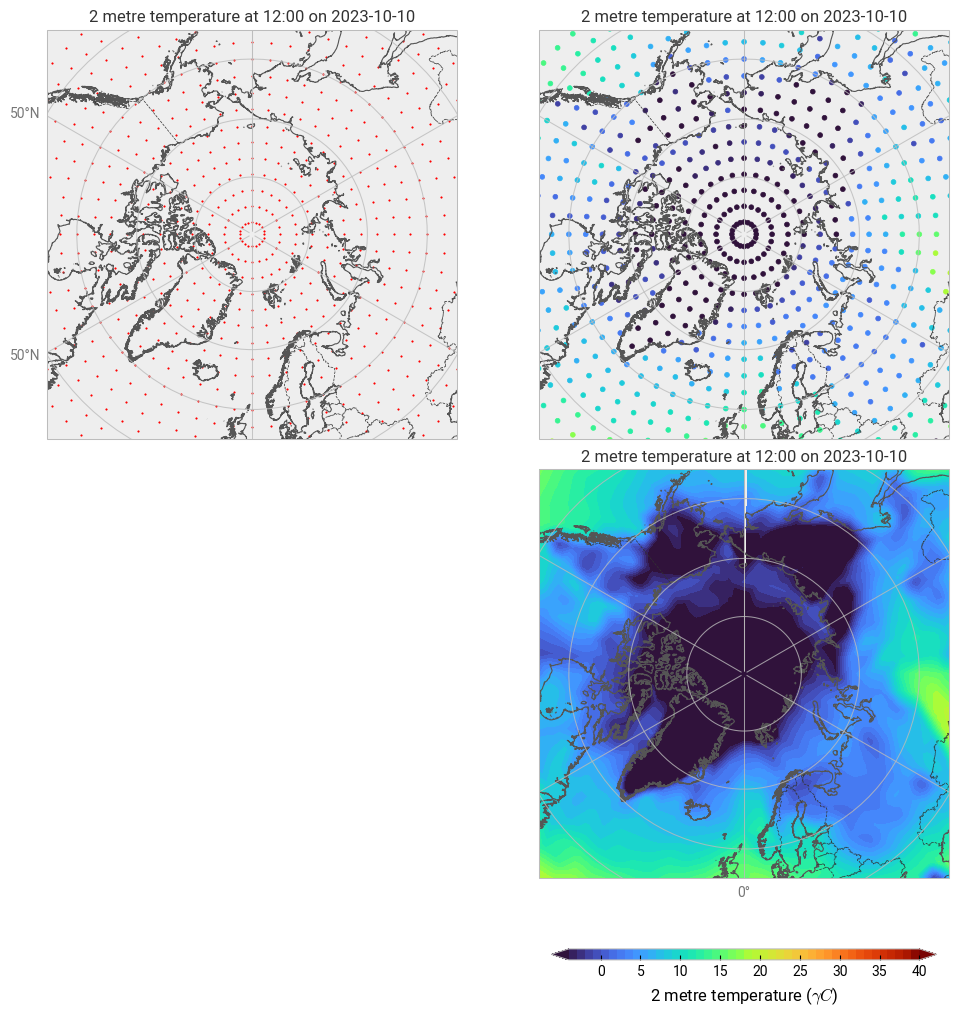

In [8]:
figure = earthkit.plots.Figure(rows=2, columns=2, size=(10, 10))

figure.add_map(domain="Arctic").gridpoints(reduced_gg)
figure.add_map(domain="Arctic").point_cloud(reduced_gg, style=STYLE)
# figure.add_map(domain="Arctic").block(reduced_gg, style=STYLE)
figure.add_map(1, 0, domain="Arctic").contourf(reduced_gg, style=STYLE)

figure.coastlines()
figure.borders()
figure.gridlines(sharex=True, sharey=True)

figure.subplot_titles()

figure.legend()

figure.show()